In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cmap = 'Blues'

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [36]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [37]:
# Drop unnamed and id.

In [38]:
train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [39]:
# Visualization.

In [41]:
df = train.append(test)

In [42]:
# It seems like the data is quite balanced, with slightly more neutral or dissatisfied costumers.

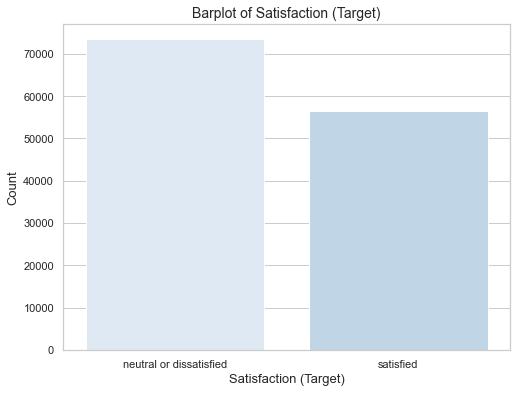

In [47]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='satisfaction', data=df)
plt.title('Barplot of Satisfaction (Target)', fontsize=14)
plt.xlabel('Satisfaction (Target)', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

In [48]:
# Categorical Variables.

In [49]:
# Define categorical columns list.
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

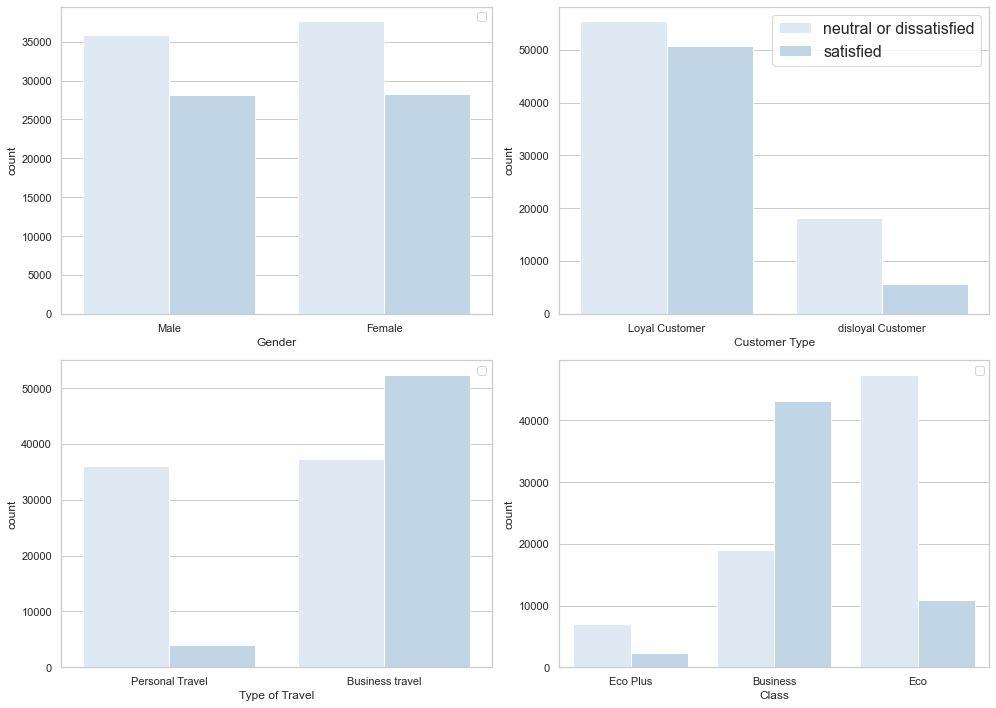

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.ravel()

i=0
for col in cat_cols:
    
    # Define location
    plt.subplot(2, 2, i+1)
    
    # Create plot
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = df)
    
    # Remove legend
    ax.legend('')
    
    i += 1

# Add legend
axs[1].legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()

In [51]:
# Points:
# Males and females have similar satisfaction rates.
# Disployal costumers are more dissatisfied compared to loyal costumers.
# Personal travel are more dissatisfied compared to buisness travel.
# Eco class are more dissatisfied compared to buisness class.

In [52]:
# Correlation.

In [53]:
# Create labels for categorical columns
label = LabelEncoder()

labeled_df = df.copy()
for i in cat_cols:
    labeled_df[i] = label.fit_transform(labeled_df[i])

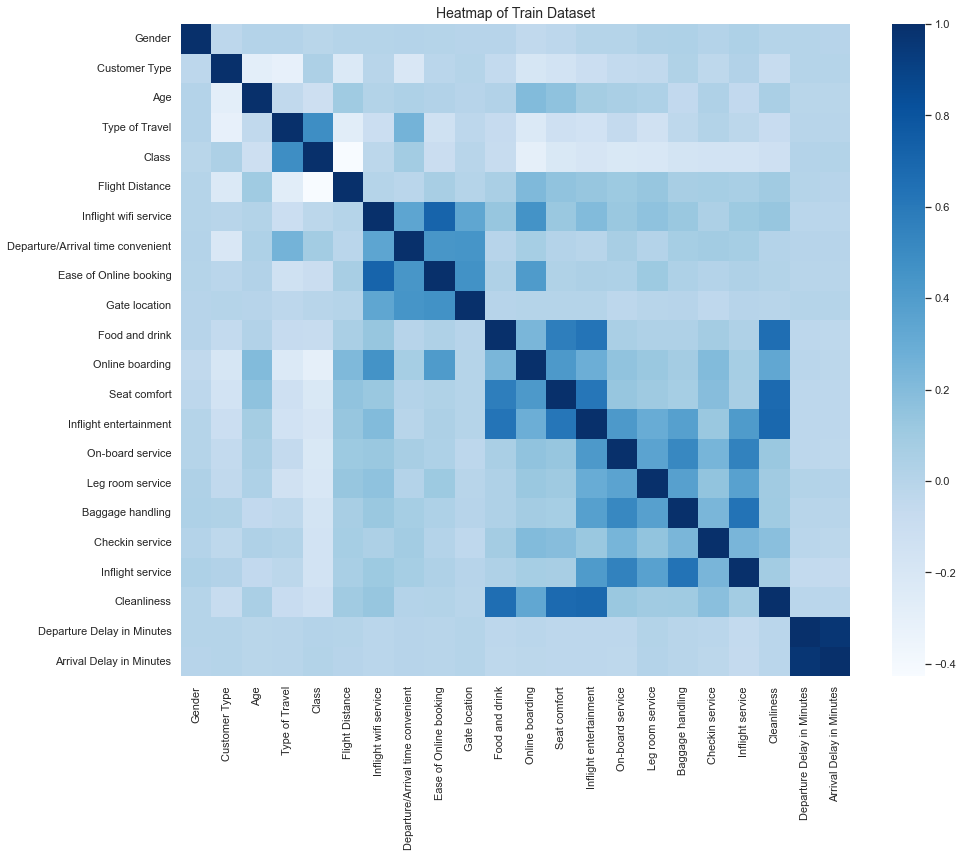

In [54]:
plt.figure(figsize=(15, 12))
sns.heatmap(labeled_df.corr(), cmap=cmap)
plt.title('Heatmap of Train Dataset', fontsize=14)
plt.show()

In [55]:
cor = df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'])

In [56]:
# Most features don't seem to be very correlated.
# Except for Departure Delay in Minutes and Arrival Delay in Minutes which have a correlation score of 0.96.

In [57]:
# One hot encoding

In [61]:
dummy_train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
dummy_test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

In [62]:
dummy_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,satisfied,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,satisfied,1,0,0,0,0


In [63]:
train_df = dummy_train.copy()
test_df = dummy_test.copy()

In [64]:
# Scaling

In [65]:
train_cols = train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes']]
test_cols = test_df[['Age', 'Flight Distance', 'Departure Delay in Minutes']]

In [66]:
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(train_cols), columns = train_cols.columns)
scaled_test = pd.DataFrame(scaler.fit_transform(test_cols), columns = test_cols.columns)

In [67]:
scaled_train.head().style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', 
                                                                                            props=[('text-align', 'center')])])

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745279,-0.731539,0.266393
1,-0.951360,-0.957184,-0.361375
2,-0.885200,-0.047584,-0.387532
3,-0.951360,-0.629246,-0.099805
4,1.430397,-0.978244,-0.387532


In [68]:
cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

train_df[cols] = scaled_train
test_df[cols] = scaled_test

In [69]:
train_df.head().style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', 
                                                                                        props=[('text-align', 'center')])])

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.266393,18.000000,neutral or dissatisfied,1,0,1,0,1
1,-0.951360,-0.957184,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.361375,6.000000,neutral or dissatisfied,1,1,0,0,0
2,-0.885200,-0.047584,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.387532,0.000000,satisfied,0,0,0,0,0
3,-0.951360,-0.629246,2,5,5,5,2,2,2,2,2,5,3,1,4,2,-0.099805,9.000000,neutral or dissatisfied,0,0,0,0,0
4,1.430397,-0.978244,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.387532,0.000000,satisfied,1,0,0,0,0
